<a href="https://colab.research.google.com/github/ClarisseAlvarenga/data_science_alura_cursos/blob/master/Teste_de_Hip%C3%B3tese_Alura_Clarisse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 3</font>

***

## Trabalho sobre testes de hipóteses

Utilizando os conhecimentos adquiridos em nosso treinamento realize o teste de hipóteses proposto abaixo.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais testes interessantes que podem ser realizados com o nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import normaltest, norm, chi, chisquare, mannwhitneyu, wilcoxon
from scipy.stats import t as t_student
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW, ztest

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importe o dataset e armazene o conteúdo em uma DataFrame

In [3]:
dados = pd.read_csv('/content/dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Visualize o conteúdo do DataFrame

In [4]:
#como já visualizei no código acima, vamos ver as informações das colunas aqui
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


## <font color='red'>Problema</font>

Você é um pesquisador que estuda o mercado de trabalho brasileiro e resolve estudar as diferenças salariais dos trabalhadores dos estados do Rio de Janeiro e de São Paulo. Durante sua pesquisa você verifica que, aparentemente, os rendimentos dos trabalhadores no estado do Rio de Janeiro são mais baixos que os rendimentos dos trabalhadores no estado de São Paulo. Para confirmar esta conclusão realize um teste de hipótese de comparação de médias em cima de duas amostras de trabalhadores dos dois estados. Siga as seguintes etapas:

- Selecione duas amostras de **500 trabalhadores** para cada um dos dois estados (variável UF) para realizar o teste. Utilize o **parâmetro random_state=101**.
- Considere o **nível de significância de 5%**.
- Teste a hipótese de que a **renda média dos trabalhadores do Rio de Janeiro é menor que a renda média dos trabalhadores de São Paulo**.

---

### Seleção das amostras

In [66]:
amostra_sp = dados.query('UF == 35').sample(500, random_state=101).Renda
amostra_sp

49905    1800
47376     700
50288    8000
54266    1800
54578    2364
         ... 
48673    1090
47090    1530
49367    1500
47178    1200
50778     900
Name: Renda, Length: 500, dtype: int64

In [67]:
amostra_rj = dados.query('UF == 33').sample(500, random_state=101).Renda
amostra_rj

45760     1300
42265    35000
41069     1300
44659     2364
46366     1500
         ...  
41430        0
41175     1200
46168     1800
42005     2500
45970     5000
Name: Renda, Length: 500, dtype: int64

### Dados do problema
Obter média e desvio-padrão para as duas amostras

In [0]:
#teste unicaudal inferior
significancia = 0.05
confianca = 1-significancia
n_RJ = len(amostra_rj) #por amostra
n_SP = len(amostra_sp)
H0 = 'Renda Média dos Trabalhadores do RJ é igual à renda média dos Trabalhadores de SP (mu_RJ = mu_SP)'
H1 = 'renda média dos trabalhadores do RJ é menor que a renda média dos trabalhadores de SP (mu_RJ < mu_SP).'
sp = 35
rj = 33
d_0 = n_SP - n_RJ

In [69]:
media_sp = amostra_sp.mean()
media_sp

2839.352

In [70]:
media_rj = amostra_rj.mean()
media_rj

2240.518

In [71]:
desvio_padrao_sp = amostra_sp.std()
desvio_padrao_sp

3699.384225434127

In [72]:
desvio_padrao_rj = amostra_rj.std()
desvio_padrao_rj

4643.836161867941

In [73]:
#verificando a distribuição normal
print(normaltest(amostra_sp))
print(normaltest(amostra_rj))


NormaltestResult(statistic=492.51299546881006, pvalue=1.1276177437149763e-107)
NormaltestResult(statistic=899.7196076418172, pvalue=4.2498105519217257e-196)


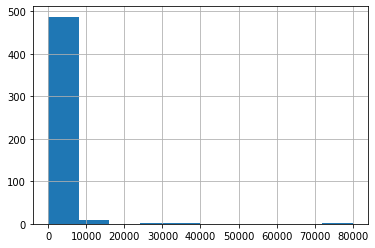

In [74]:
#plotar histograma das amostras

amostra_rj.hist()

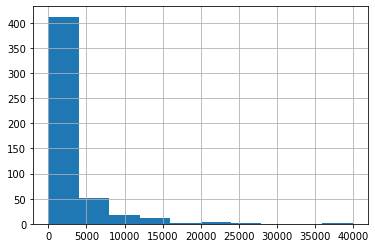

In [75]:
amostra_sp.hist()

## Lembre-se...

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

---

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

H0 = 'Renda Média dos Trabalhadores do RJ é igual à renda média dos Trabalhadores de SP (mu_RJ = mu_SP)'

H1 = 'renda média dos trabalhadores do RJ é menor que a renda média dos trabalhadores de SP (mu_RJ < mu_SP).'(Formule suas hipóteses aqui)

---

### **Passo 2** - escolha da distribuição amostral adequada

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### Podemos afirmar que a população se distribui aproximadamente como uma normal?
#### Resp.: não  - independente para este teste

### O desvio padrão populacional é conhecido?
#### Resp.: não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [85]:
#usa a significancia para o unicaudal inferior. Caso fosse superior seria a confiança- o parâmetro é "probabilidade"
z_alpha = norm.ppf(significancia)
z_alpha

-1.6448536269514729

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

In [94]:
#cálculo "na unha", usando a fórmula da figura
numerador = (media_rj - media_sp) - d_0
denominador = np.sqrt((desvio_padrao_rj**2/n_RJ) + (desvio_padrao_sp**2/n_SP))
z_teste = numerador/denominador
z_teste

-2.255318273608561

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

### <font color='red'>Critério do valor crítico</font>

In [88]:
if (z_teste <= z_alpha):
  print(f'Rejeita a hipótese de que {H0}')
  print(f'Aceita a hipótese de que {H1}')
else:
  print(f'Aceita {H0}')

Rejeita a hipótese de que Renda Média dos Trabalhadores do RJ é igual à renda média dos Trabalhadores de SP (mu_RJ = mu_SP)
Aceita a hipótese de que renda média dos trabalhadores do RJ é menor que a renda média dos trabalhadores de SP (mu_RJ < mu_SP).


### <font color='red'>Critério do valor $p$</font>

### Utilize DescrStatsW

In [0]:
#criando os objetos
test_RJ = DescrStatsW(amostra_rj)
test_SP = DescrStatsW(amostra_sp)

In [91]:
#usando o get_compare para testar duas hipóteses
teste = test_RJ.get_compare(test_SP)
z, p_value = teste.ztest_ind(alternative='smaller', value=0)
print('Z de teste = ',z)
print('p_valor = ',p_value)

Z de teste =  -2.255318273608558
p_valor =  0.012056679215693396


In [81]:
p_value <= significancia

True

In [92]:
#verificando a aceitação da hipótese
if (p_value <= significancia):
  print(f'Rejeita a hipótese de que {H0}')
  print(f'Aceita a hipótese de que {H1}')
else:
  print(f'Aceita {H0}')

Rejeita a hipótese de que Renda Média dos Trabalhadores do RJ é igual à renda média dos Trabalhadores de SP (mu_RJ = mu_SP)
Aceita a hipótese de que renda média dos trabalhadores do RJ é menor que a renda média dos trabalhadores de SP (mu_RJ < mu_SP).


### Utilize CompareMeans

In [0]:
teste_compare = CompareMeans(test_RJ, test_SP)

In [62]:
z_1, p_value_1 = teste_compare.ztest_ind(alternative='smaller', value=0)
print(z_1)
print(p_value_1)

-2.255318273608558
0.012056679215693396


In [93]:
#verificando a aceitação da hipótese
if (p_value_1 <= significancia):
  print(f'Rejeita a hipótese de que {H0}')
  print(f'Aceita a hipótese de que {H1}')
else:
  print(f'Aceita {H0}')

Rejeita a hipótese de que Renda Média dos Trabalhadores do RJ é igual à renda média dos Trabalhadores de SP (mu_RJ = mu_SP)
Aceita a hipótese de que renda média dos trabalhadores do RJ é menor que a renda média dos trabalhadores de SP (mu_RJ < mu_SP).


### <font color='green'>Conclusão: Conclusão: Com um nível de confiança de 95% rejeitamos  H0 , isto é, concluímos que a média das rendas dos chefes de domicílios do RJ é menor que a média das rendas das chefes de domicílios de SP. Confirmando a alegação de desigualdade de renda entre os estados.</font>